In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.cluster import KMeans

In [2]:
one_hot = pd.read_csv("one_hot_responses.csv")
one_hot = one_hot.drop(columns=["Unnamed: 0"])

In [3]:
# Very masculine, Somewhat masculine, Not very masculine, Not at all masculine
#masculinity_scale = [col for col in one_hot.columns if col.startswith('q0001')]
# Straight, Gay, Bisexual, Other
#sexuality_scale = [col for col in one_hot.columns if col.startswith('q0026')]
# print(masculinity_scale)
#print(sexuality_scale)

# top n pca
n = 30
predictors = [one_hot.columns[i] for i in range(len(one_hot.columns))]
X = one_hot[predictors].values.T
n_i, n_j = X.shape
stds = np.std(X, axis=1)
stds = np.repeat(np.reshape(stds, (-1,1)), n_j, axis=1)
S = X/stds
pcs = PCA(n_components=n).fit_transform(S.T)
df_pcs = pd.DataFrame(pcs, columns=['PC'+str(i+1) for i in range(n)])

# predict whether the person was masculine based on their survey responses
df_pcs['y'] = one_hot['q0001'].values

In [35]:
# 10 fold cross validation, linear regression
mean_mses = []
kf = KFold(n_splits=10, shuffle=True)
pc_numbers = [i+1 for i in range(n)]
# linear models using top k=1,2,3,...,20
for num_pc in pc_numbers:
    # do 10-fold cross validation
    train_mses = []
    test_mses = []
    for train_idx, test_idx in kf.split(df_pcs):
        df_train = df_pcs.iloc[train_idx, :]
        df_test = df_pcs.iloc[test_idx, :]
        
        # generate formula
        formula = 'y ~ 1'
        for num in range(1, num_pc+1):
            formula += (' + PC%d' % num)
            
        # fit model with df_train
        res = smf.ols(formula=formula, data=df_train).fit()

        # MSE of training set
        train_pred = res.predict(df_train)
        mse_train = np.mean((train_pred - df_train.y)**2)

        # MSE of test set
        test_pred = res.predict(df_test)
        mse_test = np.mean((test_pred - df_test.y)**2)

        # store results
        train_mses.append(mse_train)
        test_mses.append(mse_test)



    # report average training MSE and testing MSE
    mean_train_mse = np.mean(train_mses)
    mean_test_mse = np.mean(test_mses)
    
    mean_mses.append({'num_pc': num_pc,
                      'formula': formula,
                    'mean_train_mse': mean_train_mse,
                     'mean_test_mse': mean_test_mse})
    
    
df_res = pd.DataFrame(mean_mses)
df_res

,formula,mean_test_mse,mean_train_mse,num_pc
0,y ~ 1 + PC1,0.027619,0.027591,1
1,y ~ 1 + PC1 + PC2,0.027679,0.027568,2
2,y ~ 1 + PC1 + PC2 + PC3,0.025894,0.025692,3
3,y ~ 1 + PC1 + PC2 + PC3 + PC4,0.024912,0.024705,4
4,y ~ 1 + PC1 + PC2 + PC3 + PC4 + PC5,0.024190,0.023842,5
5,y ~ 1 + PC1 + PC2 + PC3 + PC4 + PC5 + PC6,0.024338,0.023831,6
6,y ~ 1 + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7,0.024420,0.023766,7
7,y ~ 1 + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC...,0.023849,0.023225,8
8,y ~ 1 + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC...,0.023147,0.022460,9
9,y ~ 1 + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC...,0.022716,0.022252,10


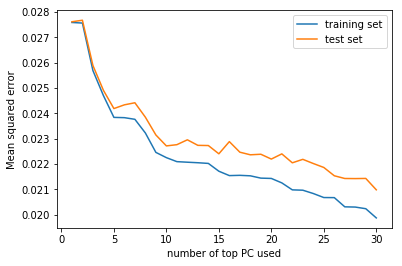

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  


formula           y ~ 1 + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC...
mean_test_mse                                             0.0209818
mean_train_mse                                            0.0198717
num_pc                                                           30
Name: 29, dtype: object

In [36]:
fig, ax = plt.subplots()
ax.plot(df_res.num_pc, df_res.mean_train_mse, label='training set')
ax.plot(df_res.num_pc, df_res.mean_test_mse, label='test set')
ax.legend()
ax.set_xlabel('number of top PC used')
ax.set_ylabel('Mean squared error')
plt.show()
best_model = df_res.loc[df_res.mean_test_mse.argmin()]
best_model

In [33]:
# 10 fold cross validation, logistic regression
df_pcs = df_pcs.fillna(0)
mean_mses = []
kf = KFold(n_splits=5, shuffle=True)
pc_numbers = [i+1 for i in range(n)]
# linear models using top k=1,2,3,...,20
for num_pc in pc_numbers:
    # do 10-fold cross validation
    train_mses = []
    test_mses = []
    for train_idx, test_idx in kf.split(df_pcs):
        df_train = df_pcs.iloc[train_idx, :]
        df_test = df_pcs.iloc[test_idx, :]
        
        # generate formula
        formula = 'y ~ 1'
        for num in range(1, num_pc+1):
            formula += (' + PC%d' % num)
            
        # fit model with df_train
        res = smf.logit(formula=formula, data=df_train).fit(disp=0)

        # MSE of training set
        train_pred = 1*(res.predict(df_train) > 0.5)
        mse_train = np.mean((train_pred - df_train.y)**2)

        # MSE of test set
        test_pred = 1*(res.predict(df_test) > 0.5)
        mse_test = np.mean((test_pred - df_test.y)**2)

        # store results
        train_mses.append(mse_train)
        test_mses.append(mse_test)



    # report average training MSE and testing MSE
    mean_train_mse = np.mean(train_mses)
    mean_test_mse = np.mean(test_mses)
    
    mean_mses.append({'num_pc': num_pc,
                      'formula': formula,
                    'mean_train_mse': mean_train_mse,
                     'mean_test_mse': mean_test_mse})
    
    
df_res = pd.DataFrame(mean_mses)
df_res

,formula,mean_test_mse,mean_train_mse,num_pc
0,y ~ 1 + PC1,0.028483,0.028483,1
1,y ~ 1 + PC1 + PC2,0.028483,0.028483,2
2,y ~ 1 + PC1 + PC2 + PC3,0.026625,0.026625,3
3,y ~ 1 + PC1 + PC2 + PC3 + PC4,0.026006,0.026161,4
4,y ~ 1 + PC1 + PC2 + PC3 + PC4 + PC5,0.027864,0.026625,5
5,y ~ 1 + PC1 + PC2 + PC3 + PC4 + PC5 + PC6,0.027864,0.026316,6
6,y ~ 1 + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7,0.027245,0.026625,7
7,y ~ 1 + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC...,0.026006,0.023375,8
8,y ~ 1 + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC...,0.028483,0.024458,9
9,y ~ 1 + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC...,0.025387,0.024458,10


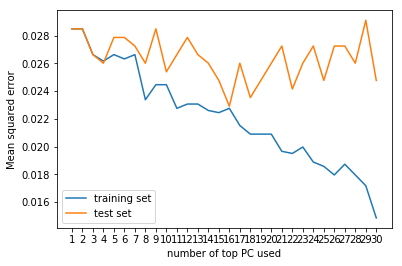

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  if __name__ == '__main__':


formula           y ~ 1 + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC...
mean_test_mse                                             0.0229102
mean_train_mse                                            0.0227554
num_pc                                                           16
Name: 15, dtype: object

In [34]:
fig, ax = plt.subplots()
ax.plot(df_res.num_pc, df_res.mean_train_mse, label='training set')
ax.plot(df_res.num_pc, df_res.mean_test_mse, label='test set')
ax.legend()
ax.set_xticks(df_res.num_pc.values)
ax.set_xlabel('number of top PC used')
ax.set_ylabel('Mean squared error')
plt.show()
best_model = df_res.loc[df_res.mean_test_mse.argmin()]
best_model

In [13]:
# try doing polynomial fit with different degrees 
# and find the optimal degree (the model with the lowest testing MSE of 10-fold cross-validation)

degrees = [1, 2, 3]
kf = KFold(n_splits=10, shuffle=True)
mean_mses = []

# 10 PCs
formula = 'y ~ 1'
for num in range(1, 10+1):
    formula += (' + PC%d' % num)
            
for degree in degrees:
    # do a d=degree polynomial fit with 10-fold cross-validation and report training and testing MSE
    train_mses = []
    test_mses = []
    for train_idx, test_idx in kf.split(df_pcs):
        df_train = df_pcs.iloc[train_idx, :]
        df_test = df_pcs.iloc[test_idx, :]

        # MSE of training set
        train_X = PolynomialFeatures(degree=degree).fit_transform(df_train.drop(columns = 'y'))
        train_model = sm.OLS(df_train.y, train_X).fit()
        train_yhat = train_model.predict()
        for k in range(0, train_yhat.shape[0]):
            if train_yhat[k] > 0.8:
                train_yhat[k] = 1
            else: 
                train_yhat[k] = 0
        mse_train = np.mean((train_yhat - df_train.y)**2)

        # MSE of test set
        test_X = PolynomialFeatures(degree=degree).fit_transform(df_test.drop(columns = 'y'))
        test_yhat = train_model.predict(test_X)
        for k in range(0, test_yhat.shape[0]):
            if test_yhat[k] > 0.8:
                test_yhat[k] = 1
            else: 
                test_yhat[k] = 0
        mse_test = np.mean((test_yhat - df_test.y)**2)

        # store results
        train_mses.append(mse_train)
        test_mses.append(mse_test)

    # report average training MSE and testing MSE
    mean_train_mse = np.mean(train_mses)
    mean_test_mse = np.mean(test_mses)
    
    mean_mses.append({'degree': degree,
                      'formula': formula,
                    'mean_train_mse': mean_train_mse,
                     'mean_test_mse': mean_test_mse})
df_res = pd.DataFrame(mean_mses)
df_res

,degree,formula,mean_test_mse,mean_train_mse
0,1,y ~ 1 + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC...,0.023533,0.024149
1,2,y ~ 1 + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC...,0.053838,0.008531
2,3,y ~ 1 + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC...,0.232179,0.000000
